In [1]:
# ======== importing modules ========
from pytransit import MandelAgol
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=np.nan)
import pandas as pd

fs = 22; ms = 4 #fontsize, markersize

#========== Karen's inverse weighted binning function =======
def Bin_func(time,flux,error,binsize):
    good = np.where(np.isfinite(time)) # finding where values are finite and "Not a Number (NaN)" or +/- infinite (inf)
    timefit = time[good] 
    fluxfit = flux[good] #using indices where values are finite, find where times, flux and errors are also finite
    errfit  = error[good]
    timemax = np.max(timefit) #find max time (or last time measurement)
    timemin = np.min(timefit) #find min time (or first time measurement)
    npoints = len(timefit)    #find number of data points
    nbins   = int(math.ceil((timemax - timemin)/binsize)) #binsize in days to nearest interger
    bintime = np.full((nbins,), np.nan) 
    binflux = np.full((nbins,), np.nan) #creating an empty array full of NaNs to fill in below
    binerr  = np.full((nbins,), np.nan)
    for i in range(0,nbins-1):
        tobin = [np.where( (timefit >= (timemin + i*binsize)) & (timefit < (timemin + (i+1)*binsize)) )] #with given binsize, searching over smaller areas (aka windows) (t-window) to (t+window)
        if tobin[0] != -1:
    #     inverse variance weighted means; read about here: https://en.wikipedia.org/wiki/Inverse-variance_weighting
    
            binflux[i] = ((fluxfit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            bintime[i] = ((timefit[tobin]/(errfit[tobin]**2.0)).sum()) / ((1.0/errfit[tobin]**2.0).sum())
            binerr[i]  = 1.0 / (np.sqrt( (1.0/errfit[tobin]**2.0)).sum() )
    
    good2   = np.where(np.isfinite(bintime)) #checking again for NaNs and infs that might be created by previous step
    bintime = bintime[good2]
    binflux = binflux[good2] 
    binerr  = binerr[good2]
    
    return bintime, binflux, binerr #here you have binned data with averaged values based on the bin sizes you've selected

In [2]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
path = '/Users/felizd/Desktop/Felix/TESSdata/' #location of where I put downloaded files

data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(path) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print "number of files: ",len(data) #number of files

number of files:  8


In [3]:
print data[4][37:-3]

308613184_sector01_4_3


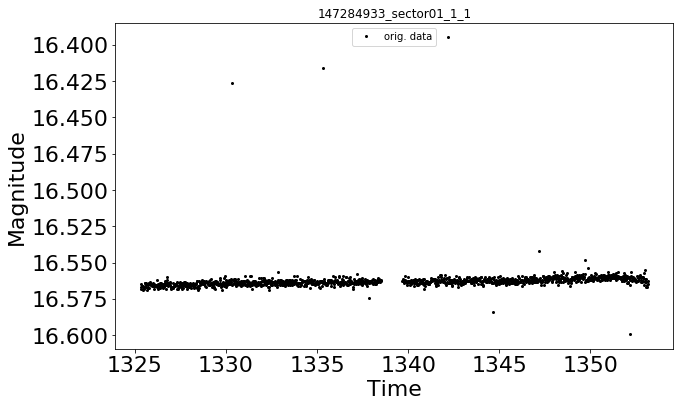

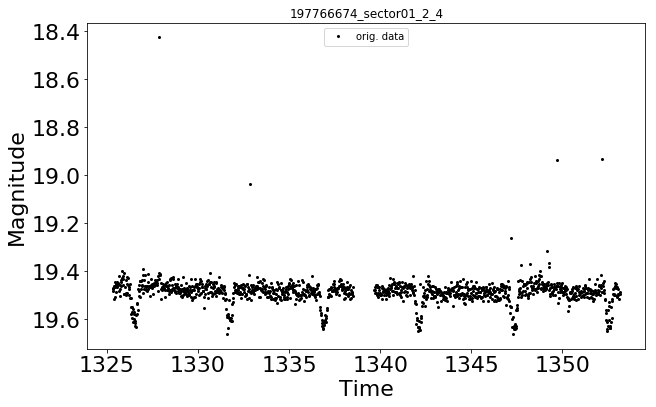

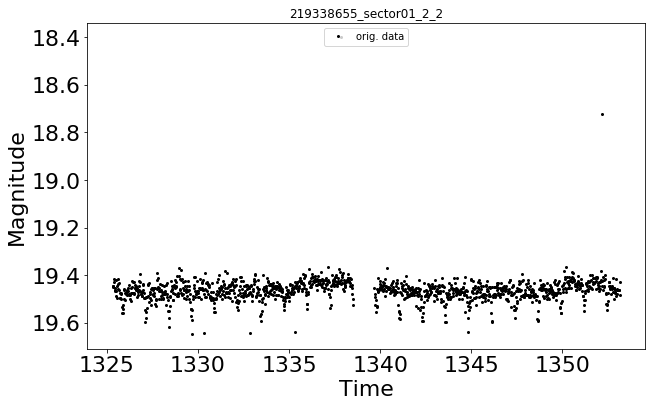

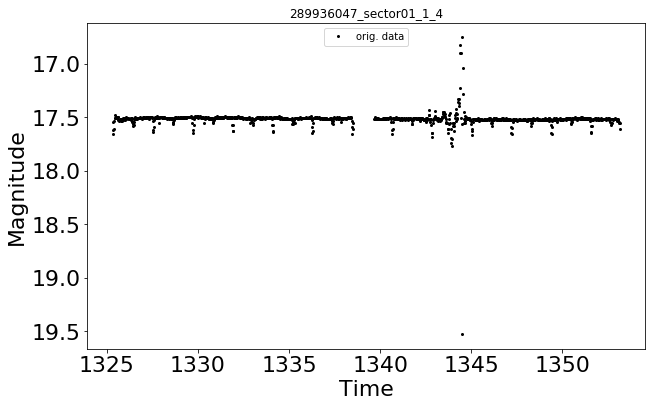

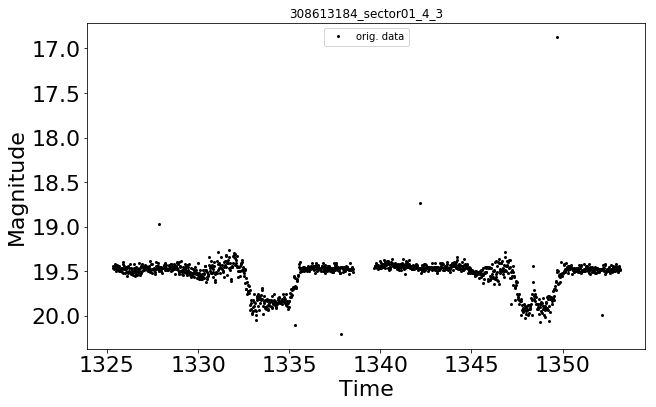

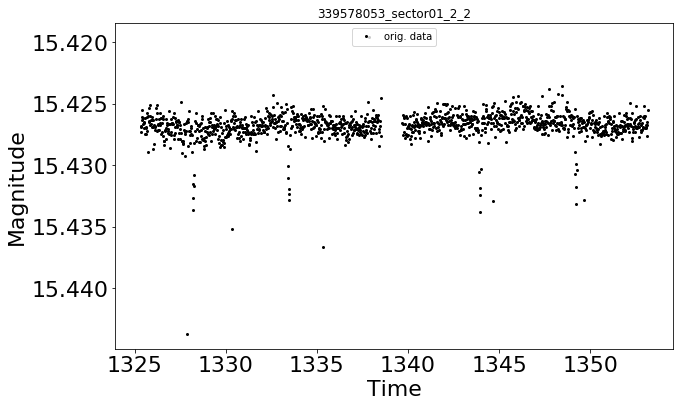

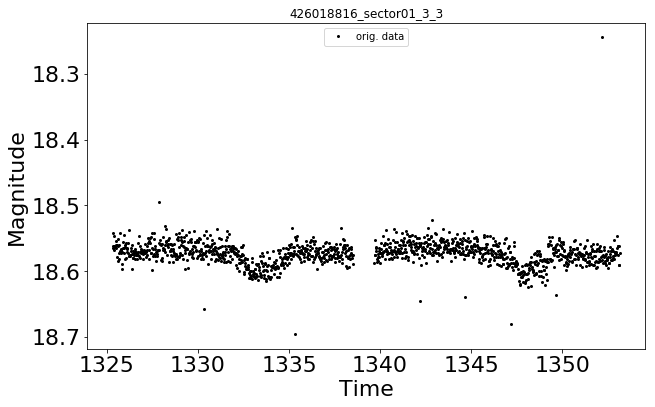

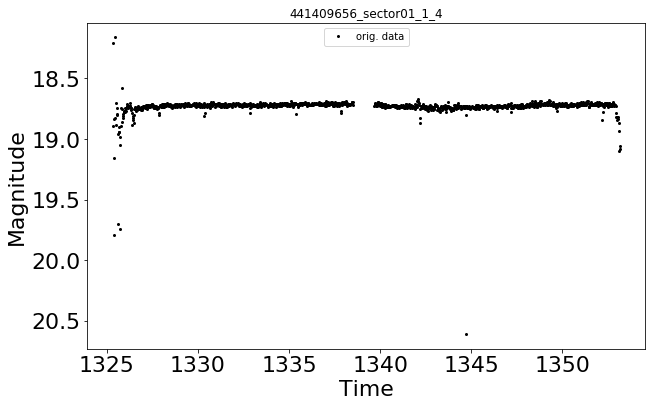

In [4]:
for d in range(len(data)): #creating a for loop to show light curve figures for all files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    
    plt.figure(figsize=(10,6)) #creating figure
    plt.plot(time,mag,color='black', marker='.',linestyle='none',markersize=ms,label="orig. data") #each data point is a dot, and are not connected by lines
    plt.gca().invert_yaxis()  # remember magnitude is inverted (brightest is more negative, faintest is more positive)
    plt.title(str(data[d][37:-3])) #str = string, the [37:-3] removes the pathname before the filename and the .lc at the end
    plt.xlabel("Time",fontsize=fs)
    plt.ylabel("Magnitude",fontsize=fs)
    plt.xticks(fontsize=fs) #making tick labels bigger than default
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper center')
    plt.show() #shows figure
    print "" #adds space between figures

Let's trying running a rolling mean to get a better idea of what is going on without outliers


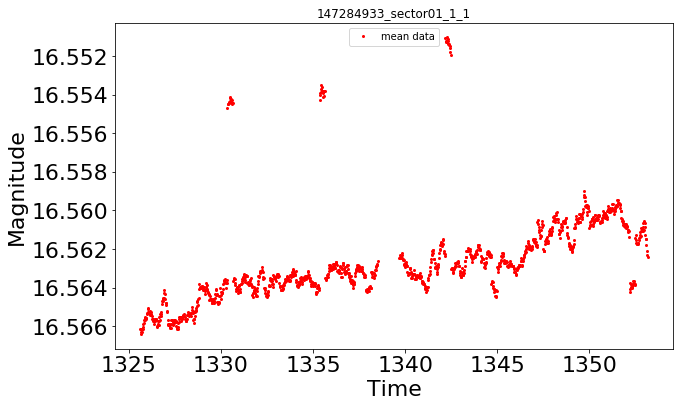

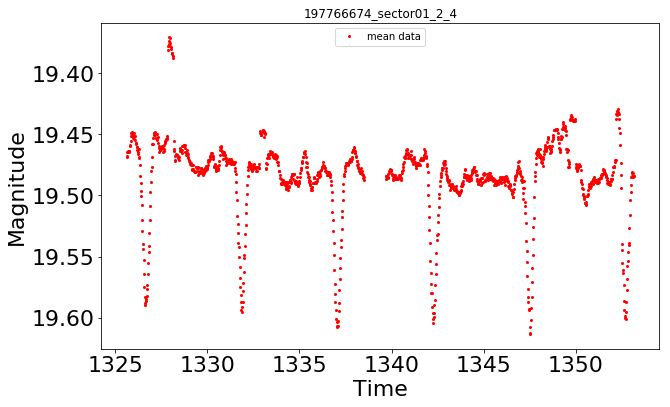

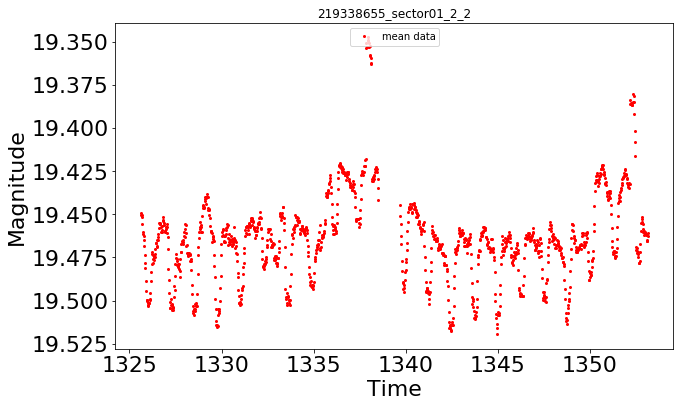

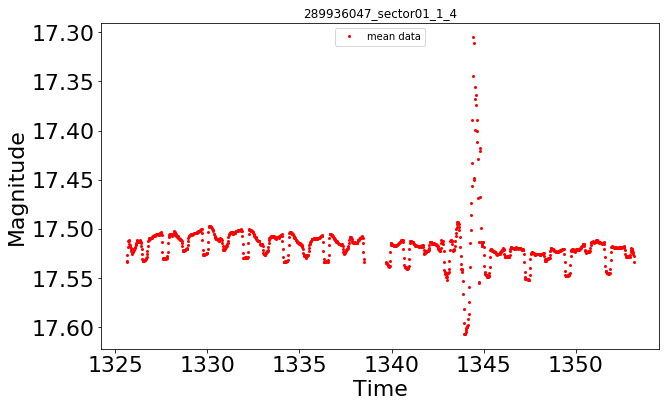

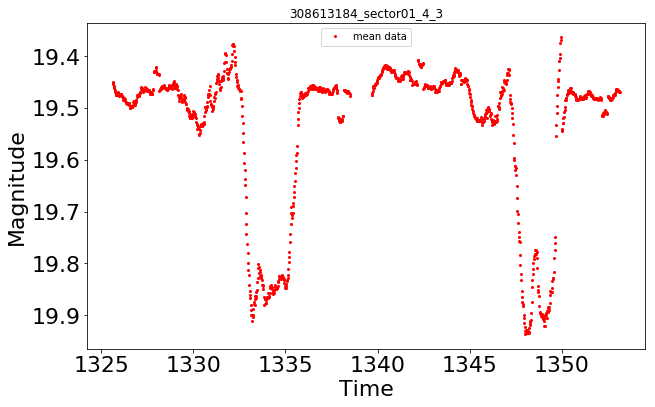

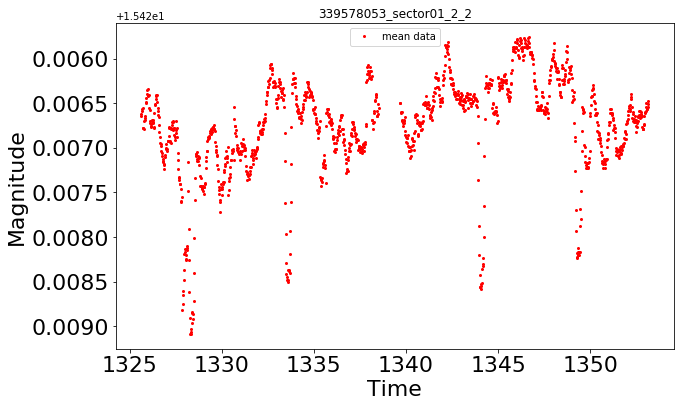

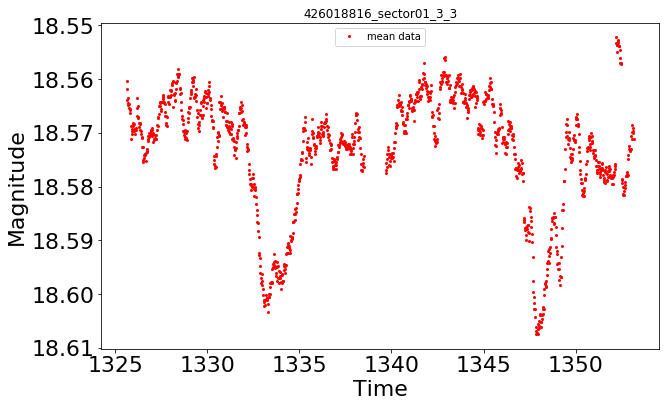

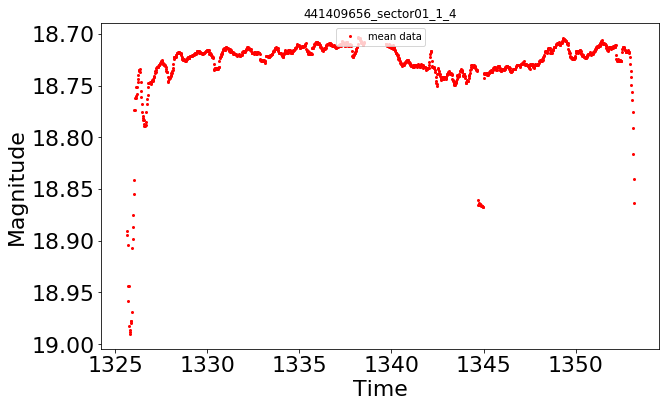

In [5]:
print "Let's trying running a rolling mean to get a better idea of what is going on without outliers"
# https://en.wikipedia.org/wiki/Moving_average

for d in range(len(data)): #creating a for loop to show light curve figures for all files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    
    mag_mean = np.array(pd.DataFrame(mag).rolling(15).mean()) #allows 15 data points in moving window
    
    plt.figure(figsize=(10,6)) #creating figure
#     plt.plot(time,mag,color='black', marker='.',linestyle='none',markersize=ms,label="orig. data") #each data point is a dot, and are not connected by lines
    plt.plot(time,mag_mean,color='red',marker='.',linestyle='none',markersize=ms,label="mean data") 
    plt.gca().invert_yaxis()  # remember magnitude is inverted (brightest is more negative, faintest is more positive)
    plt.title(str(data[d][37:-3])) #str = string, the [37:-3] removes the pathname before the filename and the .lc at the end
    plt.xlabel("Time",fontsize=fs)
    plt.ylabel("Magnitude",fontsize=fs)
    plt.xticks(fontsize=fs) #making tick labels bigger than default
    plt.yticks(fontsize=fs)
    plt.legend(loc='upper center')    
    plt.show() #shows figure
    print "" #adds space between figures
    mag_mean = np.array(pd.DataFrame(mag).rolling(15).mean()) #allows 15 data points in moving window


In [6]:
# print "converting to flux"

# flux2 = 10.0**(mag[cut2]/-2.5)
# print "normalizing flux"
# normflux2 = flux2/ np.mean(flux2)

# fluxerror = flux2*(10.0**(magerror[cut2]/2.5)-1.0)

# plt.plot(time[cut2], normflux2,marker='.',linestyle='none')
# plt.xlabel("Time")
# plt.ylabel("Normalized Flux")
# plt.show()

In [7]:

# binsize = (1./24.0); print binsize

# print "don't worry about errors, some things are being divided by 0 but we take care of that"
# bint,binf,binfe = Bin_func(time[cut2],normflux2,magerror[cut2],binsize)
# print "don't worry about errors, some things are being divided by 0 but we take care of that"


# print "comparing cut data with cut and binned data"
# plt.figure(figsize=(10,6))
# plt.plot(time[cut2], normflux2,marker='.',color='black',linestyle='none',zorder=0,label="cut data")
# plt.plot(bint,binf,marker='.',color='r',linestyle='none',zorder=1,label="cut and binned data")
# plt.xlabel("Time")
# plt.ylabel("Normalized Flux")
# plt.legend(loc='best') 
# plt.show()


# np.savetxt("TESSdata/cut_data_147284933_sector01_1_1.txt", zip(bint,binf,binfe))

In [8]:
# duration = bint[-1] - bint[0] #last - first data point of light curve

# #min, max periods:
# Pmin = 1.01
# Pmax =  31.0

# #min, max fractional transit duration (q = transit duration / orbital period)
# qmin = 0.01
# qmax = 0.1

# Nfreq = round(4.0*duration*(1./Pmin - 1./Pmax)/qmin,1) #number of frequencies to fix boxes to ; rounds to nearest decimal
# Nbins = 2.0/qmin # number of phase bins to fold our data over
# Npeaks = 4 #number of top peaks in power spectrum to report

# print "duration of binned light curved:", duration
# print "max, min orbital period: ", Pmin, Pmax
# print "max, min fractional transit duration: ", qmin, qmax
# print "number of frequencies: ", Nfreq
# print "number of phase bins: ", Nbins

# TIC = "147284933_sector01_1_1" #TESS ID number of this object

# print " "
# print ('sh BLS.sh /Users/felizd/Desktop/Felix/TESSdata/cut_data_147284933_sector01_1_1.txt '+str(qmin)+" "+str(qmax)+" "+str(Pmin)+" "+str(Pmax)+" "+str(Nfreq)+ " "+str(Nbins)+" "+str(Npeaks)+" "+str(TIC) ) 


# os.system('sh BLS.sh /Users/felizd/Desktop/Felix/TESSdata/cut_data_147284933_sector01_1_1.txt '+str(qmin)+" "+str(qmax)+" "+str(Pmin)+" "+str(Pmax)+" "+str(Nfreq)+ " "+str(Nbins)+" "+str(Npeaks)+" "+str(TIC)) 

# print ""
# print "now to load in results"

In [9]:
# BLS_output = np.loadtxt("TESSdata/147284933_sector01_1_1_BLS_output.txt", usecols=[2], skiprows=1)

# print "printing top 4 peaks and their orbital periods"
# for i in range(Npeaks): 
#     print BLS_output[0::18][:-1][i]
    
# BLS_Period = np.transpose(np.loadtxt("outdir/cut_data_147284933_sector01_1_1.txt.bls"))[0]
# BLS_SN = np.transpose(np.loadtxt("outdir/cut_data_147284933_sector01_1_1.txt.bls"))[1]

# print "plotting BLS power spectrum: "

# plt.figure(figsize=(10,6))
# plt.plot(BLS_Period,BLS_SN,color='grey',zorder=1)
# plt.xlabel("Orbital Period (days)")
# plt.ylabel("Signal to Noise S/N")
# plt.axvline(x=BLS_output[0::18][:-1][0],label = "period: "+str(np.round(BLS_output[0::18][:-1][0],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][1],label = "period: "+str(np.round(BLS_output[0::18][:-1][1],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][2],label = "period: "+str(np.round(BLS_output[0::18][:-1][2],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][3],label = "period: "+str(np.round(BLS_output[0::18][:-1][3],3)),zorder=0)
# plt.legend()
# plt.show()

# print 

# plt.figure(figsize=(10,6))
# plt.plot(BLS_Period,BLS_SN,color='grey',zorder=1)
# plt.xlim(0.9,6)
# plt.ylim(-2,3)
# plt.xlabel("Orbital Period (days)")
# plt.ylabel("Signal to Noise S/N")
# plt.axvline(x=BLS_output[0::18][:-1][0],label = "period: "+str(np.round(BLS_output[0::18][:-1][0],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][1],label = "period: "+str(np.round(BLS_output[0::18][:-1][1],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][2],label = "period: "+str(np.round(BLS_output[0::18][:-1][2],3)),zorder=0)
# plt.axvline(x=BLS_output[0::18][:-1][3],label = "period: "+str(np.round(BLS_output[0::18][:-1][3],3)),zorder=0)
# plt.show()